# Part II - (Ford GoBike Data Visual Exploration)
## by (Joshua Nnatus)


## Investigation Overview


> In this investigation, I wanted to look at the interesting relationship between distance and age, and how gender, distance covered (km) is distributed among those that use the bike for all trips.


## Dataset Overview

> The data consisted of bike trips and it's features of 183,412 trips. The features of the bike trips includes duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, and feature engineered features includes member_age, distance_km, start_time_weekday, start_time_hour, end_time_hour, and duration_minutes. 
>
>10,873 data points were removed from the analysis due to inconsistencies or missing information, and the clean saved in an cvs document 174952 data points


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_clean= pd.read_csv("fordGoBike_clean.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of distance covered (km) for Ford Gobike trips

> The distance covered in km covered 0.0km to 2.22km, where 15.6km appears to be an outlier, this suggestive that the bike were used basically for short distances. Plot on histogram is the distribution of distance covered in km

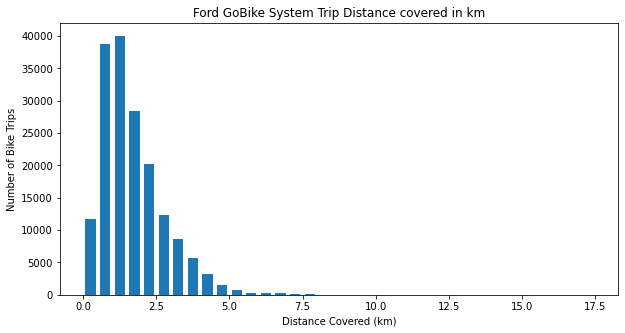

In [3]:
# Distance covered in Km
# Distance is continuous data approximated bit, so I would use a histogram and put a width

# To set good size for the plot
plt.figure(figsize= [10, 5])

# To specify bin size
bin_mins = np.arange(0, bike_clean.distance_km.max()+2, 0.5)

plt.hist(data = bike_clean, x = 'distance_km', bins = bin_mins, rwidth = 0.7)

# Titling and labelling
plt.title("Ford GoBike System Trip Distance covered in km")
plt.xlabel('Distance Covered (km)')
plt.ylabel('Number of Bike Trips');

## Distribution of user member age for Ford Gobike trips

> The age of riders were from 20 to about 60+, using the guinness world records [LYNNEA SALVO](https://www.guinnessworldrecords.com/world-records/590324-oldest-person-to-cross-america-by-bicycle-n-s-female) at the age of 72 as a bench mark to remove outliers. The plot  shows the distribution of age among the Ford GoBike riders

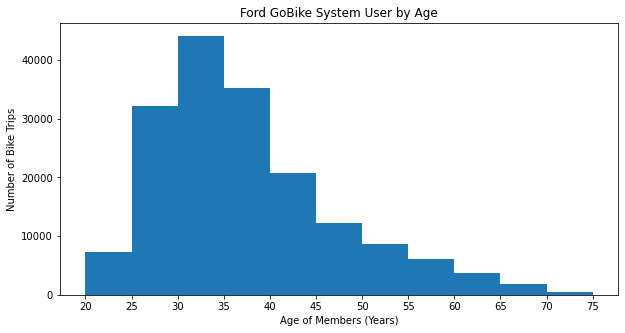

In [4]:
# To set good size for the plot
plt.figure(figsize= [10, 5])

# To specify bin
bin_age = np.arange(20, bike_clean.member_age.max()+5, 5)

# Select ticks
tick = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
labels = ['{}'. format(i) for i in tick]
plt.hist(data = bike_clean, x="member_age", bins= bin_age)
plt.xticks(tick, labels)

# Titling and labelling
plt.title("Ford GoBike System User by Age")
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

## Age vs Distance Covered (km)

> This show the relationship with Age and distance covered in km. The findings here shows a peak and decline, it is obvious that rider are can or that covers most distances are between the ages of 25 to 40. While most distance covered is from 0km to 4.5 km 


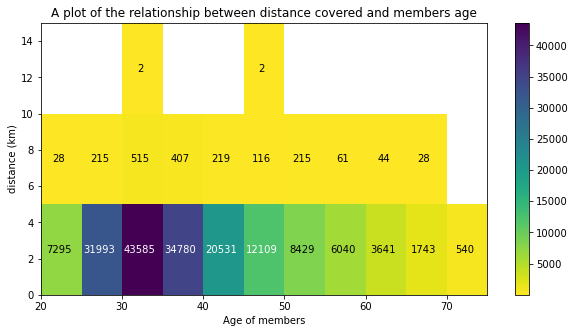

In [5]:
# It would be lovely to know if member_age has any relationship with distance covered on the ride
# Both age and starting hour are discrete quantitative data, I would be using a heat map

# To set good size for the plot
plt.figure(figsize= [10, 5])

#Specifying the bin
bins_x = np.arange(20, bike_clean.member_age.max()+5, 5)
bins_y = np.arange(0, bike_clean.distance_km.max()+4, 5)

# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = bike_clean, x = 'member_age', y = 'distance_km', 
                 cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Age of members')
plt.ylabel('distance (km)')
plt.title("A plot of the relationship between distance covered and members age");

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 12000: # increase visibility on darker cells
            plt.text(bins_x[i]+2.20, bins_y[j]+2.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+2.20, bins_y[j]+2.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Bike share for all trips and Average Distance Covered by Gender

> This show the relationship with member gender, Average distance covered and if they used the bike for all trip. This is an interesting plot that shows other genders trend to cover more average distances when they don't use the bike for all trips

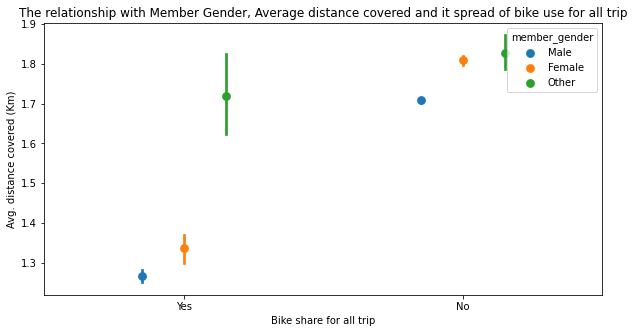

In [6]:
# To see the relationship with Gender (categorical variable), Average Distance (Quantitative Variable) 
# and bike for all trip (categorical variable)
# I will be using pointplot to display the relationship

# To set good size for the plot
plt.figure(figsize= [10, 5])

sb.pointplot(data=bike_clean, x='bike_share_for_all_trip', y='distance_km', 
             hue='member_gender', dodge=0.3, linestyles="", );

# Titling and labelling
plt.xlabel('Bike share for all trip');
plt.ylabel('Avg. distance covered (Km)')
plt.title("The relationship with Member Gender, Average distance covered and it spread of bike use for all trip");

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [7]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --ServePostProcessor.port=8910 --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 667993 bytes to Part_II_slide_deck_template.slides.html
